In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../teams.csv')
dataset.head(4)

,code,current,team,team_gender,country_code,country,country_long,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,True,People's Republic of China,M,CHN,China,People's Republic of China,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN
1,ARCMTEAM3---COL01,True,Colombia,M,COL,Colombia,Colombia,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN
2,ARCMTEAM3---FRA01,True,France,M,FRA,France,France,Archery,ARC,Men's Team,"['ADDIS Baptiste', 'CHIRAULT Thomas', 'VALLADO...",NaN,"['1541270', '1541272', '1541275']",3.0,NaN,NaN
3,ARCMTEAM3---GBR01,True,Great Britain,M,GBR,Great Britain,Great Britain,Archery,ARC,Men's Team,"['HALL Conor', 'HALL Tom', 'WISE Alex']",NaN,"['1560988', '1560989', '1561003']",3.0,NaN,NaN


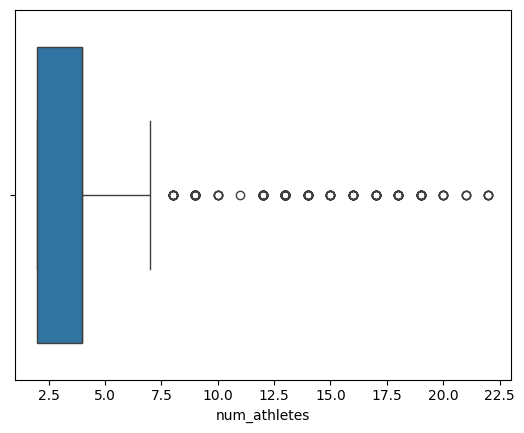

In [3]:
sns.boxplot(x='num_athletes', data = dataset)
plt.show()

In [4]:
dataset.describe()

,num_athletes,num_coaches
count,1695.000000,246.000000
mean,4.606490,4.365854
std,3.891574,2.263349
min,2.000000,1.000000
25%,2.000000,2.250000
50%,4.000000,4.000000
75%,4.000000,6.000000
max,22.000000,12.000000


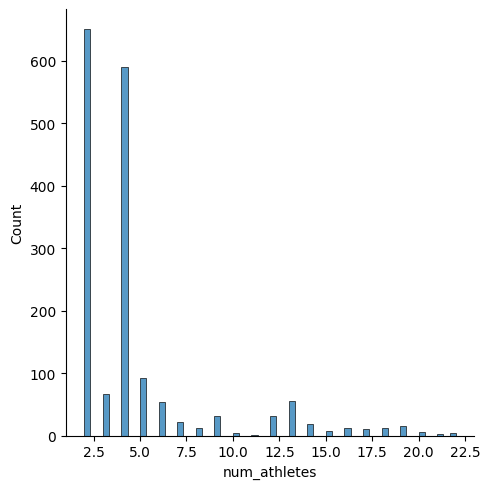

In [5]:
sns.displot(dataset['num_athletes'])

Till now we have detected the outliers in our dataset.

**Handling Outliers**

There are two methods to remove outliers from the dataset:
1. IQR Method
2. Z-Index Method

Inter Quantile Range
IQR = Q3 - Q1

min_range = Q1 - (1.5 x IQR)

max_range = Q3 - (1.5 x IQR)

In [6]:
q1 = dataset['num_athletes'].quantile(0.25)
q3 = dataset['num_athletes'].quantile(0.75)

In [7]:
IQR = q3 - q1

In [8]:
min_range = q1 - (1.5 * IQR)
max_range = q3 - (1.5 * IQR)

In [9]:
new_dataset = dataset[dataset['num_athletes']<=max_range]

In [12]:
new_dataset.shape

(0, 16)

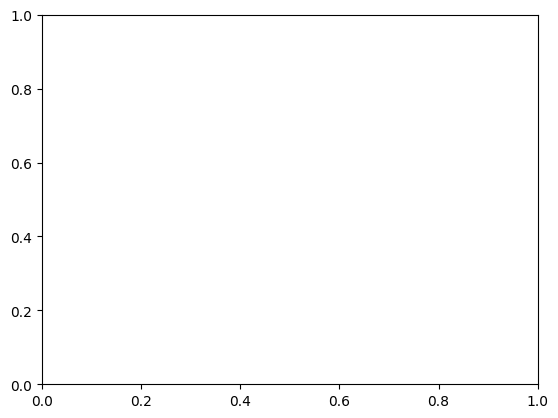

In [13]:
sns.boxplot(x='num_athletes', data = new_dataset)
plt.show()